## Distribution Network Analysis: Capacity Planning for Electric Vehicle (EV) Adoption

In [2]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Importation of the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

In [4]:
#Load data into the notebook
Distribution_Data= pd.read_csv('C:/Users/ROA\Desktop/10Alytics/AMDARI PROJECTS/synthetic_ev_distribution_data.csv')
Geospatial_Data= pd.read_csv('C:/Users/ROA/Desktop/10Alytics/AMDARI PROJECTS/synthetic_geospatial_data.csv')
Weather_Data= pd.read_csv('C:/Users/ROA/Desktop/10Alytics/AMDARI PROJECTS/synthetic_weather_data.csv')

In [5]:
Distribution_Data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Location,EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
1,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
3,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907


In [6]:
Geospatial_Data.head()

,Substation_ID,Substation_Location,Transmission_Line_Capacity (MW)
0,Substation_907,"(57.25813554648914, -70.90582041775649)",40
1,Substation_218,"(70.02538473360673, -84.38057237161145)",71
2,Substation_339,"(80.39323542610704, -75.79784143914193)",85
3,Substation_773,"(49.12307771334813, -87.3598904388042)",10
4,Substation_349,"(66.79887060665365, -86.51124108848195)",40


In [7]:
Weather_Data.head()

,Timestamp,Temperature (°C),Precipitation (mm),Weather_Conditions,Substation_ID
0,2020-01-03 11:00:00,28.865989,0.313611,Snowy,Substation_744
1,2020-01-03 17:00:00,28.902260,0.817728,Clear,Substation_516
2,2020-01-04 04:00:00,24.212651,4.516506,Clear,Substation_261
3,2020-01-04 23:00:00,29.024606,3.821278,Snowy,Substation_560
4,2020-01-05 00:00:00,24.126655,4.965771,Snowy,Substation_258


### Understanding the structure of the datasets

In [8]:
# Check data types and missing values
Distribution_Data.info()

# Decription of numerical columns
Distribution_Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           500 non-null    object 
 1   Geographical_Area                   500 non-null    object 
 2   Customer_Type                       500 non-null    object 
 3   Electricity_Consumption (kWh)       500 non-null    float64
 4   EV_Charging_Station_Location        500 non-null    object 
 5   EV_Charging_Station_Specifications  500 non-null    object 
 6   EV_Type                             500 non-null    object 
 7   Charging_Habit                      500 non-null    object 
 8   Number_of_EVs                       500 non-null    int64  
 9   Substation_ID                       500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


,Electricity_Consumption (kWh),Number_of_EVs
count,500.000000,500.000000
mean,506.188554,5.240000
std,80.251238,2.577535
min,315.912577,1.000000
25%,439.978312,3.000000
50%,505.820872,5.000000
75%,557.230712,8.000000
max,718.980293,9.000000


In [9]:
# Check data types and missing values
Geospatial_Data.info()

# Decription of numerical columns
Geospatial_Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Substation_ID                    50 non-null     object
 1   Substation_Location              50 non-null     object
 2   Transmission_Line_Capacity (MW)  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


,Transmission_Line_Capacity (MW)
count,50.000000
mean,52.740000
std,24.857808
min,10.000000
25%,33.250000
50%,51.500000
75%,74.750000
max,94.000000


In [10]:
# Check data types and missing values
Weather_Data.info()

# Decription of numerical columns
Weather_Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           97 non-null     object 
 1   Temperature (°C)    97 non-null     float64
 2   Precipitation (mm)  97 non-null     float64
 3   Weather_Conditions  97 non-null     object 
 4   Substation_ID       97 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.9+ KB


,Temperature (°C),Precipitation (mm)
count,97.000000,97.000000
mean,25.311668,2.542096
std,4.821917,1.396957
min,12.449425,0.007923
25%,22.245088,1.390244
50%,25.248302,2.688862
75%,28.902260,3.656106
max,34.104493,4.965771


### Exploratory Data Analysis

This phase involves both Univariate and Bivariate Analysis

### Univariate Analysis
1. Visualize the distribution of electricity consumption.
2. Analyze the distribution of EV types, charging habits, customer type

### Bivariate Analysis
3. Use geospatial data to visualize the locations of substations and EV charging stations.
4. Analyze the capacity of transmission lines.

### Univariate Analysis

C:\Users\ROA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


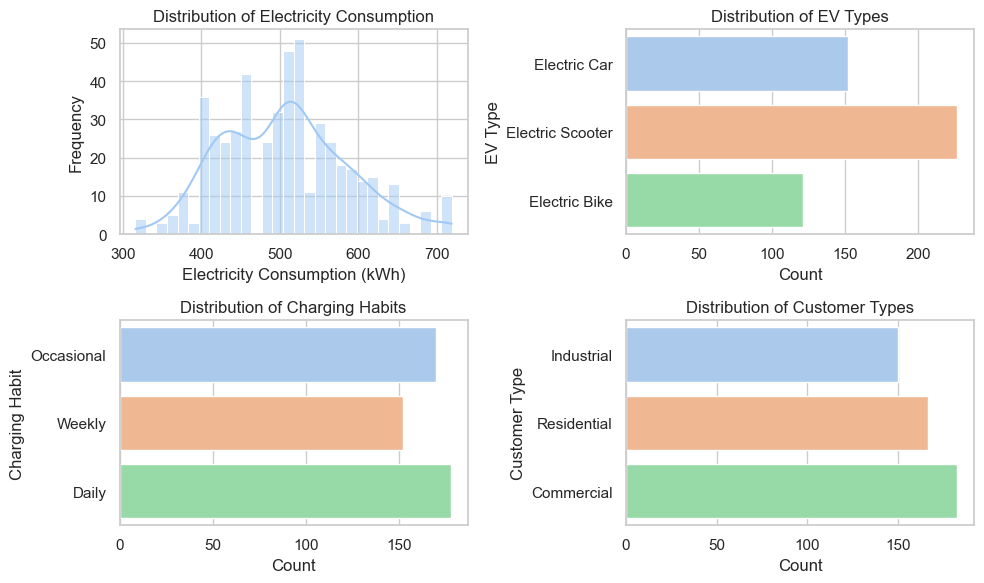

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

#set the style and color palette of the plots
sns.set(style="whitegrid")
sns.set_palette("pastel")

#create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

#plot the distribution of electricity consumption
sns.histplot(data=Distribution_Data, x="Electricity_Consumption (kWh)", bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Electricity Consumption")
axes[0, 0].set_xlabel("Electricity Consumption (kWh)")
axes[0, 0].set_ylabel("Frequency")

#plot the distribution of EV types
sns.countplot(data=Distribution_Data, y="EV_Type", ax=axes[0, 1])
axes[0, 1].set_title("Distribution of EV Types")
axes[0, 1].set_xlabel("Count")
axes[0, 1].set_ylabel("EV Type")

#plot the distribution of Charging Habits
sns.countplot(data=Distribution_Data, y="Charging_Habit", ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Charging Habits")
axes[1, 0].set_xlabel("Count")
axes[1, 0].set_ylabel("Charging Habit")

#plot the distribution of Customer type
sns.countplot(data=Distribution_Data, y="Customer_Type", ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Customer Types")
axes[1, 1].set_xlabel("Count")
axes[1, 1].set_ylabel("Customer Type")

# Adjust Layout
plt.tight_layout()

# Show the plots
plt.show()

### Bivariate Analysis

In [12]:
#extract Lat and Long for EV charging stations
Distribution_Data['ev_latitude'] = Distribution_Data ['EV_Charging_Station_Location'].apply(
lambda x: float(x.split(",")[0]. replace("(", "").strip()))
Distribution_Data['ev_longitude'] = Distribution_Data ['EV_Charging_Station_Location'].apply(
lambda x: float(x.split(",")[1]. replace(")", "").strip()))

#extract Lat and Long for substation location
Geospatial_Data['substation_latitude'] = Geospatial_Data ['Substation_Location'].apply(
lambda x: float(x.split(",")[0]. replace("(", "").strip()))
Geospatial_Data['substation_longitude'] = Geospatial_Data ['Substation_Location'].apply(
lambda x: float(x.split(",")[1]. replace(")", "").strip()))

#drop the original location columns to clean up the dataframe
Distribution_Data = Distribution_Data.drop(columns = ['EV_Charging_Station_Location'])
Geospatial_Data = Geospatial_Data.drop(columns = ['Substation_Location'])


In [13]:
Distribution_Data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID,ev_latitude,ev_longitude
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
1,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
3,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964


In [14]:
Geospatial_Data.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude
0,Substation_907,40,57.258136,-70.905820
1,Substation_218,71,70.025385,-84.380572
2,Substation_339,85,80.393235,-75.797841
3,Substation_773,10,49.123078,-87.359890
4,Substation_349,40,66.798871,-86.511241


C:\Users\ROA\AppData\Local\Temp\ipykernel_13264\1343909180.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


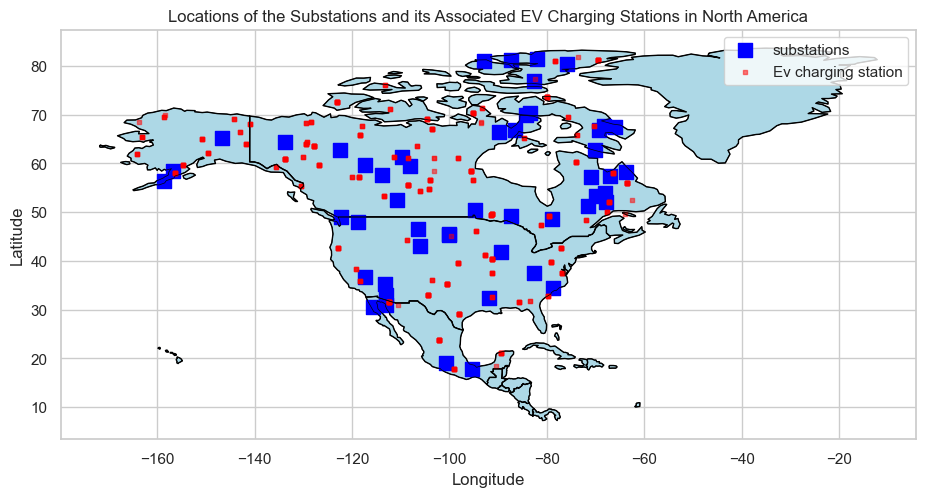

In [15]:
# Convert the dataframes to Geodataframes
ev_gdf = gpd.GeoDataFrame(Distribution_Data,
                         geometry=gpd.points_from_xy(Distribution_Data.ev_longitude, Distribution_Data.ev_latitude))
substation_gdf = gpd.GeoDataFrame(Geospatial_Data,
                         geometry=gpd.points_from_xy(Geospatial_Data.substation_longitude, Geospatial_Data.substation_latitude))

#Load the world map data
world= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#filter the map to North America
north_america = world[world['continent']== "North America"]

#plotting the map for north america
fig, ax = plt.subplots(figsize= (10, 5))
north_america.boundary.plot(ax=ax, linewidth= 0.5, color= 'black')
north_america.plot(ax=ax, color='lightblue', edgecolor= 'black')

#plotting the substations on the map
substation_gdf.plot(ax=ax, marker= 's', markersize = 100, color = 'blue', label= 'substations')

#plotting ev charging stations on the map
ev_gdf.plot(ax=ax, marker= 's', markersize = 10, color = 'red', label= 'Ev charging station', alpha = 0.5)

#set title and axis labels
plt.title('Locations of the Substations and its Associated EV Charging Stations in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
from shapely.geometry import LineString

C:\Users\ROA\AppData\Local\Temp\ipykernel_13264\3003947599.py:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


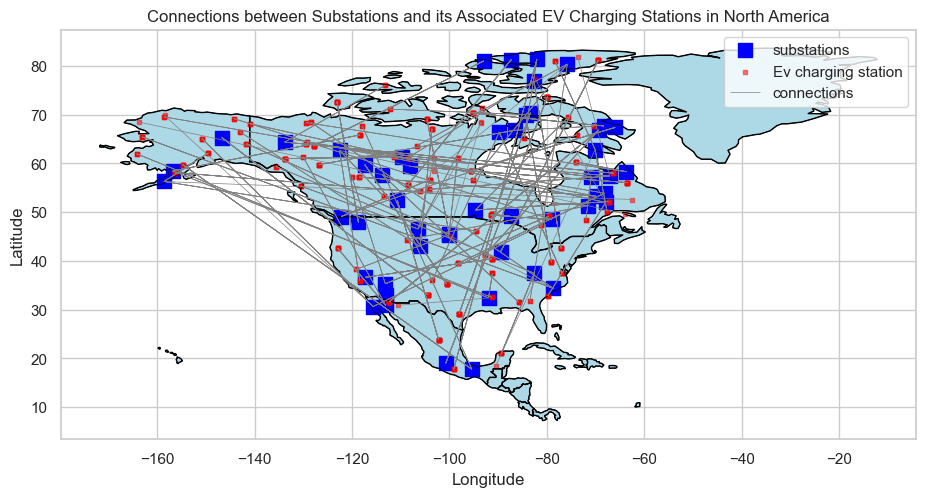

In [17]:
# Convert the dataframes to Geodataframes
ev_gdf = gpd.GeoDataFrame(Distribution_Data,
                         geometry=gpd.points_from_xy(Distribution_Data.ev_longitude, Distribution_Data.ev_latitude))
substation_gdf = gpd.GeoDataFrame(Geospatial_Data,
                         geometry=gpd.points_from_xy(Geospatial_Data.substation_longitude, Geospatial_Data.substation_latitude))

#create lines connecting each substation to it's associated ev charging station
lines= []
for _, ev_row in Distribution_Data.iterrows():
    substation = Geospatial_Data[Geospatial_Data['Substation_ID'] == ev_row['Substation_ID']].iloc[0]
    line=[(ev_row['ev_longitude'], ev_row['ev_latitude']),
         (substation['substation_longitude'], substation['substation_latitude'])]
    lines.append(line)

line_gdf= gpd.GeoDataFrame(geometry=[LineString(line) for line in lines])

#Load the world map data
world= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#filter the map to North America
north_america = world[world['continent']== "North America"]

#plotting the map for north america
fig, ax = plt.subplots(figsize= (10, 5))
north_america.boundary.plot(ax=ax, linewidth= 0.5, color= 'black')
north_america.plot(ax=ax, color='lightblue', edgecolor= 'black')

#plotting the substations on the map
substation_gdf.plot(ax=ax, marker= 's', markersize = 100, color = 'blue', label= 'substations')

#plotting ev charging stations on the map
ev_gdf.plot(ax=ax, marker= 's', markersize = 10, color = 'red', label= 'Ev charging station', alpha = 0.5)

#plotting line
line_gdf.plot(ax=ax, linewidth= 0.5, color= 'grey', label= 'connections')

#set title and axis labels
plt.title('Connections between Substations and its Associated EV Charging Stations in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\ROA\AppData\Local\Temp\ipykernel_13264\3408636183.py:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


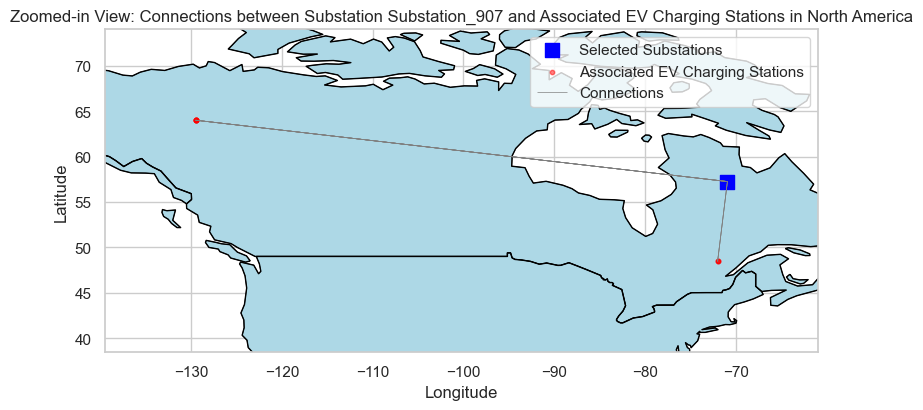

In [18]:
# Let's zoom in and see the connection of substation 1 to EV charging stations

# Filter for the first substation
selected_substation = Geospatial_Data.iloc[0]
associated_ev = Distribution_Data[Distribution_Data['Substation_ID'] == selected_substation['Substation_ID']]

# Convert to GeoDataFrames
ev_gdf_selected = gpd.GeoDataFrame(associated_ev, geometry=gpd.points_from_xy(associated_ev['ev_longitude'], associated_ev['ev_latitude']))
substation_gdf_selected = gpd.GeoDataFrame([selected_substation], geometry=gpd.points_from_xy(
    [selected_substation['substation_longitude']], [selected_substation['substation_latitude']]))

# Create LineString geometries for the connections
lines_selected = [LineString([(ev_row['ev_longitude'], ev_row['ev_latitude']),
                              (selected_substation['substation_longitude'], selected_substation['substation_latitude'])])
                  for _, ev_row in associated_ev.iterrows()]
line_gdf_selected = gpd.GeoDataFrame(geometry=lines_selected)

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the map to North America
north_america = world[world['continent'] == "North America"]

# Determine the bounding box for the zoomed-in area
buffer = 10  # degrees
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(8, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substations, EV charging stations, and the lines
substation_gdf_selected.plot(ax=ax, marker='s', markersize=100, color='blue', label='Selected Substations')
ev_gdf_selected.plot(ax=ax, markersize=10, color='red', label='Associated EV Charging Stations', alpha=0.5)
line_gdf_selected.plot(ax=ax, linewidth=0.5, color='grey', label='Connections')

# Setting the zoom-in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Set title and axis labels
plt.title(f"Zoomed-in View: Connections between Substation {selected_substation['Substation_ID']} and Associated EV Charging Stations in North America")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()                                        

C:\Users\ROA\AppData\Local\Temp\ipykernel_13264\3376233577.py:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


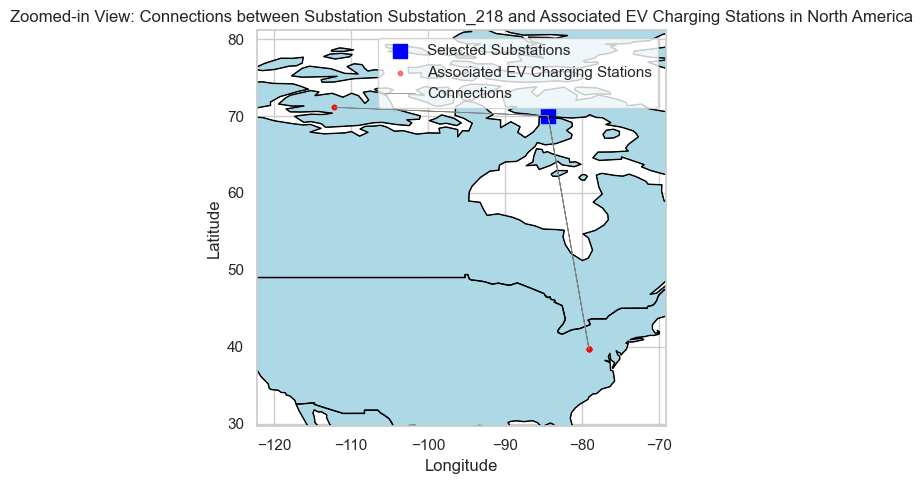

In [19]:
# Let's zoom in and see the connection of substation 1 to EV charging stations

# Filter for the first substation
selected_substation = Geospatial_Data.iloc[1]
associated_ev = Distribution_Data[Distribution_Data['Substation_ID'] == selected_substation['Substation_ID']]

# Convert to GeoDataFrames
ev_gdf_selected = gpd.GeoDataFrame(associated_ev, geometry=gpd.points_from_xy(associated_ev['ev_longitude'], associated_ev['ev_latitude']))
substation_gdf_selected = gpd.GeoDataFrame([selected_substation], geometry=gpd.points_from_xy(
    [selected_substation['substation_longitude']], [selected_substation['substation_latitude']]))

# Create LineString geometries for the connections
lines_selected = [LineString([(ev_row['ev_longitude'], ev_row['ev_latitude']),
                              (selected_substation['substation_longitude'], selected_substation['substation_latitude'])])
                  for _, ev_row in associated_ev.iterrows()]
line_gdf_selected = gpd.GeoDataFrame(geometry=lines_selected)

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the map to North America
north_america = world[world['continent'] == "North America"]

# Determine the bounding box for the zoomed-in area
buffer = 10  # degrees
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(8, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substations, EV charging stations, and the lines
substation_gdf_selected.plot(ax=ax, marker='s', markersize=100, color='blue', label='Selected Substations')
ev_gdf_selected.plot(ax=ax, markersize=10, color='red', label='Associated EV Charging Stations', alpha=0.5)
line_gdf_selected.plot(ax=ax, linewidth=0.5, color='grey', label='Connections')

# Setting the zoom-in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Set title and axis labels
plt.title(f"Zoomed-in View: Connections between Substation {selected_substation['Substation_ID']} and Associated EV Charging Stations in North America")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show() 

C:\Users\ROA\AppData\Local\Temp\ipykernel_13264\4227846881.py:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


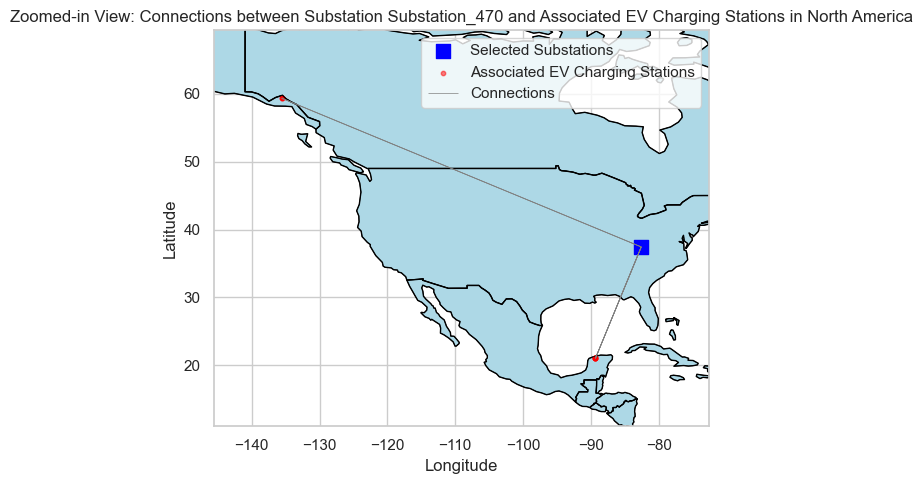

In [20]:
# Let's zoom in and see the connection of substation 1 to EV charging stations

# Filter for the first substation
selected_substation = Geospatial_Data.iloc[49]
associated_ev = Distribution_Data[Distribution_Data['Substation_ID'] == selected_substation['Substation_ID']]

# Convert to GeoDataFrames
ev_gdf_selected = gpd.GeoDataFrame(associated_ev, geometry=gpd.points_from_xy(associated_ev['ev_longitude'], associated_ev['ev_latitude']))
substation_gdf_selected = gpd.GeoDataFrame([selected_substation], geometry=gpd.points_from_xy(
    [selected_substation['substation_longitude']], [selected_substation['substation_latitude']]))

# Create LineString geometries for the connections
lines_selected = [LineString([(ev_row['ev_longitude'], ev_row['ev_latitude']),
                              (selected_substation['substation_longitude'], selected_substation['substation_latitude'])])
                  for _, ev_row in associated_ev.iterrows()]
line_gdf_selected = gpd.GeoDataFrame(geometry=lines_selected)

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the map to North America
north_america = world[world['continent'] == "North America"]

# Determine the bounding box for the zoomed-in area
buffer = 10  # degrees
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(8, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substations, EV charging stations, and the lines
substation_gdf_selected.plot(ax=ax, marker='s', markersize=100, color='blue', label='Selected Substations')
ev_gdf_selected.plot(ax=ax, markersize=10, color='red', label='Associated EV Charging Stations', alpha=0.5)
line_gdf_selected.plot(ax=ax, linewidth=0.5, color='grey', label='Connections')

# Setting the zoom-in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Set title and axis labels
plt.title(f"Zoomed-in View: Connections between Substation {selected_substation['Substation_ID']} and Associated EV Charging Stations in North America")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show() 

C:\Users\ROA\AppData\Local\Temp\ipykernel_13264\1602791527.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


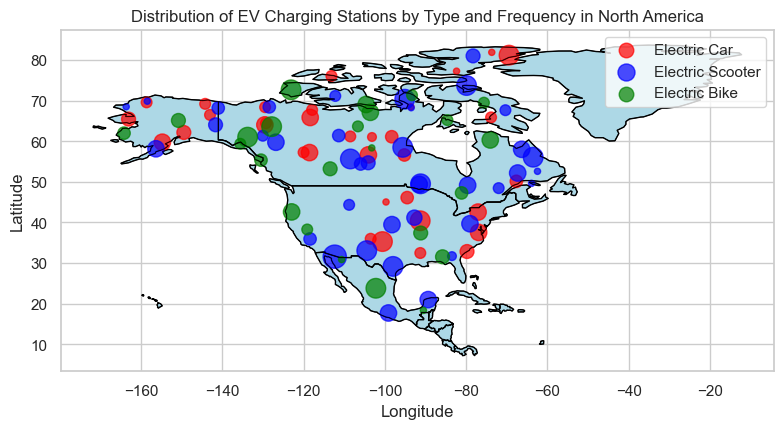

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Group by location and the EV type, then count the number of substations
grouped_data = Distribution_Data.groupby(['ev_latitude', 'ev_longitude', 'EV_Type']).size().reset_index(name='count')

# Convert grouped data to GeoDataFrame
grouped_gdf = gpd.GeoDataFrame(grouped_data,
                             geometry=gpd.points_from_xy(grouped_data.ev_longitude, grouped_data.ev_latitude))

# Load the world map data and filter for North America
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
north_america = world[world['continent'] == "North America"]

fig, ax = plt.subplots(figsize=(8, 5))
north_america.boundary.plot(ax=ax, linewidth=0.5, color='black')
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Define the colors of EV type
colors = {'Electric Car': 'red', 'Electric Scooter': 'blue', 'Electric Bike': 'green'}

# Plotting EV type
for ev_type, color in colors.items():
    sub_gdf = grouped_gdf[grouped_gdf['EV_Type'] == ev_type]
    sub_gdf.plot(ax=ax, markersize=sub_gdf['count']*20, color=color, label=ev_type, alpha=0.7)

# Set title and axis labels
plt.title("Distribution of EV Charging Stations by Type and Frequency in North America")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()


### NETWORK CAPACITY ASSESSMENT
To perform network Capacity Assessment
1. Calculate the total electricity consumption for each substation
2. Compare the total electricity consumption with the transmission line capacity.

In [38]:
#grouping by ev distribution data by substation id and calculate the total electricity consumption for each substation
total_consumption_per_substation = Distribution_Data.groupby('Substation_ID')['Electricity_Consumption (kWh)'].sum().reset_index()
#merge the total consumption data with geospatial data
network_capacity_data = pd.merge(Geospatial_Data, total_consumption_per_substation, on= 'Substation_ID')

#Renaming the columns for better understanding
network_capacity_data.rename(columns = {'Electricity_Consumption (kWh)' : 'Total_Consumption (kWh)'}, inplace= True)

#calculating the ratio of total consumption to transmission line capacity
#conversion: 1MW = 1000 kWh

network_capacity_data['Consumption_to_Capacity_Ratio']= network_capacity_data['Total_Consumption (kWh)']/ (network_capacity_data['Transmission_Line_Capacity (MW)'] * 1000)

In [39]:
network_capacity_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Consumption (kWh),Consumption_to_Capacity_Ratio
0,Substation_907,40,57.258136,-70.905820,6663.768920,0.166594
1,Substation_218,71,70.025385,-84.380572,5997.437051,0.084471
2,Substation_339,85,80.393235,-75.797841,4536.778685,0.053374
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
4,Substation_349,40,66.798871,-86.511241,4901.836555,0.122546


In [40]:
from shapely.geometry import Point

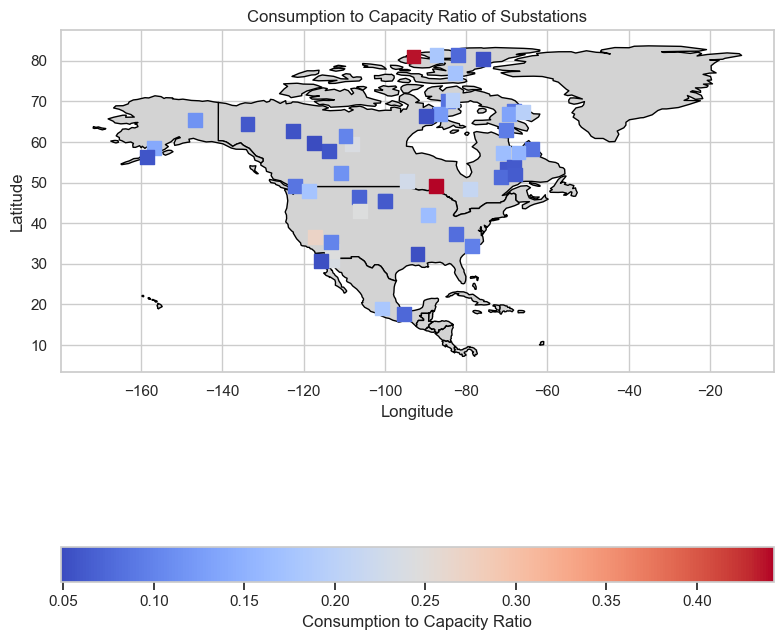

In [46]:
#create the GeoDataFrame for the network capacity for the dataframes
geometry_network_capacity = [Point(lon, lat) for lon, lat in zip (network_capacity_data['substation_longitude'], network_capacity_data['substation_latitude'])]
gdf_network_capacity = gpd.GeoDataFrame(network_capacity_data, geometry=geometry_network_capacity)

#plotting in choropleth style
fig, ax = plt.subplots(figsize= (8, 12))
north_america.plot(ax=ax, color= 'lightgray', edgecolor = 'black')
gdf_network_capacity.plot(column= 'Consumption_to_Capacity_Ratio', cmap= 'coolwarm', legend = True,
                         marker= 's', markersize= 100, ax=ax, legend_kwds={'label': "Consumption to Capacity Ratio", 'orientation': "horizontal"})

ax.set_title("Consumption to Capacity Ratio of Substations")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()

In [47]:
#group by the substation_id for the number of EV's
ev_counts=Distribution_Data.groupby('Substation_ID')['Number_of_EVs'].sum().reset_index()

#merge the network capacity data with the EV counts
final_data=pd.merge(ev_counts, network_capacity_data, on= 'Substation_ID')

#CORRELATION
correlation_ratio=final_data['Number_of_EVs'].corr(final_data['Consumption_to_Capacity_Ratio'])

In [48]:
correlation_ratio

-0.10944923035990646

<function matplotlib.pyplot.show(close=None, block=None)>

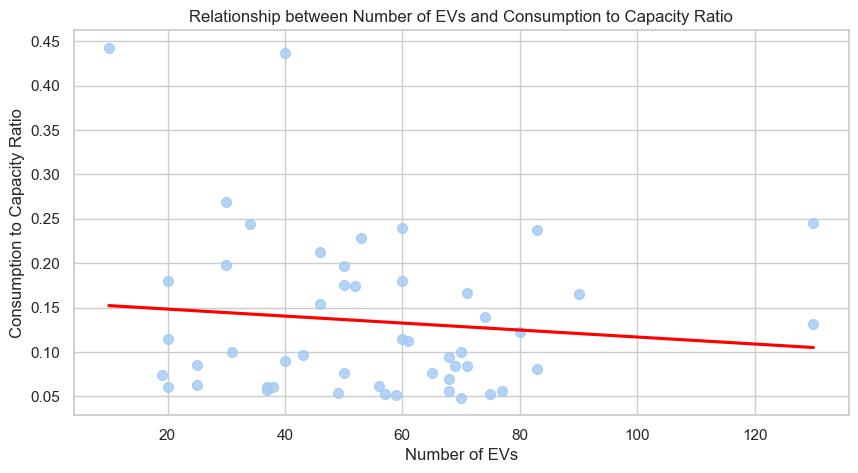

In [52]:
#scattered plot with regression line
plt.figure(figsize =(10, 5))
sns.regplot(x='Number_of_EVs', y= 'Consumption_to_Capacity_Ratio', data= final_data, scatter_kws={'s':50}, line_kws={'color':'red'}, ci= None)
plt.title('Relationship between Number of EVs and Consumption to Capacity Ratio')
plt.xlabel('Number of EVs')
plt.ylabel('Consumption to Capacity Ratio')
plt.grid(True)
plt.show

### Identifying Bottlenecks
By analyzing the map, we can identify the substation and area that are potential bottlenecks in the distribution network. These are the areas where the Consumption_to_Capacity_Ratio is high.

In [53]:
#filtering c2c greater than 1
bottleneck_substation = network_capacity_data[network_capacity_data['Consumption_to_Capacity_Ratio']>=0.9]

In [54]:
#displaying
bottleneck_substation

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Consumption (kWh),Consumption_to_Capacity_Ratio


### Optimizing Network Upgrades:
For optimizing network upgrades, focus on substations with potential to have high Consumption_to_Capacity_Ratio. Upgrading the transmission lines or adding additional capacity in these areas can help in managing the potential to have increased load effectively and ensuring grid reliability.
Additionally, let's note from the analysis:
1. The Geographical distribution of EV charging stations, where EV charging stations are quite far from the substations
2. Also, let the business look into: Potential future growth in EV adoption in different areas.
3. Cross asociated with different upgrade options.

In [55]:
#top 5 substations close to peak of overload
top_5_substations = network_capacity_data.nlargest(5, 'Consumption_to_Capacity_Ratio')
top_5_substations

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Consumption (kWh),Consumption_to_Capacity_Ratio
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
14,Substation_87,12,81.031814,-92.941747,5243.800714,0.436983
27,Substation_711,17,36.618181,-117.277556,4579.354677,0.269374
20,Substation_11,43,33.082269,-113.118931,10534.827701,0.244996
42,Substation_258,22,42.952789,-106.049333,5378.214378,0.244464


### Correlation with Weather Data
Analyzing the correlation between weather data and electricity consumption can provide insights into how weather conditions affect the distribution network.

In [58]:
#merge weather data with distribution data
merged_data = pd.merge(Distribution_Data, Weather_Data, on= ['Timestamp', 'Substation_ID'])

#calculate the correlation between weather condition and electricity consumption
correlation_matrix= merged_data[['Electricity_Consumption (kWh)', 'Temperature (°C)', 'Precipitation (mm)']].corr()

#display
correlation_matrix

,Electricity_Consumption (kWh),Temperature (°C),Precipitation (mm)
Electricity_Consumption (kWh),1.000000,0.131543,0.085014
Temperature (°C),0.131543,1.000000,-0.005828
Precipitation (mm),0.085014,-0.005828,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

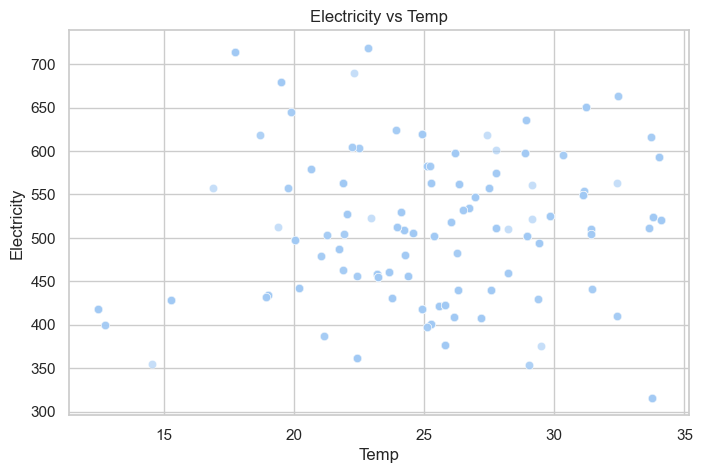

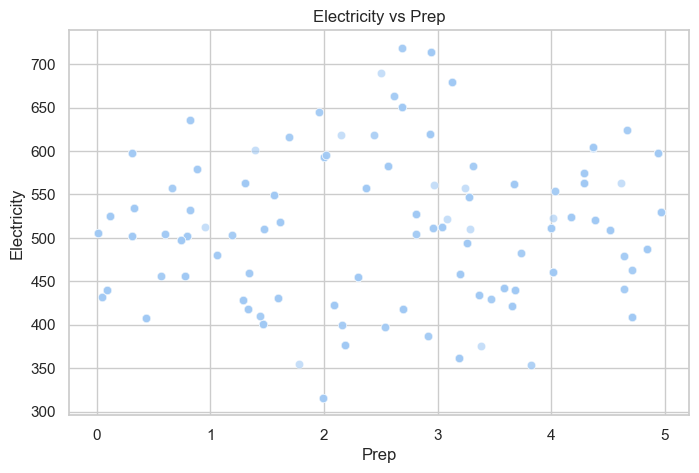

In [61]:
#Electricity consumption vs temp
plt.figure(figsize= (8, 5))
sns.scatterplot(data=merged_data, x='Temperature (°C)', y= 'Electricity_Consumption (kWh)', alpha=0.6)
plt.title("Electricity vs Temp")
plt.xlabel("Temp")
plt.ylabel ("Electricity")
plt.show

#Electricity consumption vs precipitation
plt.figure(figsize= (8, 5))
sns.scatterplot(data=merged_data, x='Precipitation (mm)', y= 'Electricity_Consumption (kWh)', alpha=0.6)
plt.title("Electricity vs Prep")
plt.xlabel("Prep")
plt.ylabel ("Electricity")
plt.show


### INSIGHTS
1. **Electricity Consumption:** The elctricity consumption is mostly centered around 500kWh, with certain instances of higher consumption. This indicates varied demand at different times and locations.
2. **EV Types and Charging Habits:** Electrics Scooters are the most common types of EVs. Most customers charge their EVs daily, indicating a consistent daily load on the distribution network.
3. **Consumer Type:** Most customers are commercial consumers.
4. **Geospatial Distribution:** The spatial distribution of substations and EV charging stations is widespread.
5. **Geospatial Distribution:** The EV charging station seems to be far from it's corresponding substation.
6. **Network Capacity:** Some substations have a high Consumption_to_Capacity_Ratio, indicating potential bottlenecks and overloads in the network. There is also no correlation with the number of EVs per substation and the Consumption to Capacity Ratio, this shows that Number of EVs is not a factor for overload.
7. **Weather Correlation:** The correlation between weather conditions (temperature and precipitation) and electricity consumption is weak in the current dataset, suggesting that other factors might be more influential in affecting electricity consumption.

### THE OPTIMIZATION STRATEGY/RECOMMENDATION
This is based on the analysis done and the business problems at hand, all these should be incorporated into the business.
1. **Prioritize Substation Upgrades:** Prioritize upgrades at substations where the Consumption_to_Capacity_Ratio is high, indicating potential overloads. Upgrade the transmission lines because the EV Charging Stations are too far from their corresponding Substations.
2. **Geospatial Analysis for Upgrade Planning:** Use geospatial analysis to determine the optimal locations for new substations or upgrades to existing ones. Consider factors like the proximity to high load demand areas (areas with high consumption to capacity ratio) and geographical constraints.
3. **Demand Side Management:** Implement demand-side management strategies to balance the load on the grid. Encourage customers to change their EVs during off-peak hours through through incentives or dynamic pricing.
4. **Advanced Monitoring and Analytics:** Deploy advanced monitoring systems to continuously monitor the health and performance of the distribution network. Use analytics to predict potential issues and take preventive action.
5. **Cross-Benefit Analysis:** Conduct a comprehensive cross-benefit analyis for different upgrade options. Consider factors like the cost of upgrades, operational costs, potential revenue from increased capacity and the impact on service relatility and customer satisfaction.
6. **Customer Engagement:** Engage with customers to understand their need and expectations. Provide clear communication about network upgrades and how they will enhance service reliability and meet the growing demand for EV charging.
7. **Continuous Improvement:** Continuously monitor and assess the performance of the distribution network. Gather feedback from customers and other stakeholders, and use this feedback to make further improvements and optimizations.

By following these steps, PowerCharge Utilities can develop an effective optimization strategy to manage the increased load demand from EV charging stations, ensure the reliability and resistance of the distribution network and meet the expectations of customers, all while optimizing costs and ensuring regulatory compliance.